In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time


In [3]:
data = pd.read_csv('F:\Grades.csv')

In [4]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
data.shape

(571, 43)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [8]:
data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [10]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [18]:
data.drop(['Seat No.'], axis=1, inplace=True)

In [19]:

def encode(model):
    cols=model.columns
        
    for i in range(len(cols)-1):
        model[cols[i]]=model[cols[i]].replace(['A+','A-','A','B','B+','B-','C','C+','C-','D','D+','F','W','WU','I'],
                                              [4,3.7,4,3,3.3,2.7,2,2.3,1.7,1,1.3,0, 0,0,0])

In [20]:
model1=data.iloc[:, :11]
model1['CGPA']=data['CGPA']

In [21]:
encode(model1)
model1.head()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,1.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,3.3,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,2.7,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,1.0,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,2.0,3.448


In [27]:

def check_multicolinearity(model_inputs):
    plt.figure(figsize=(18,11))
    sns.heatmap(model_inputs.corr(),  annot=True, annot_kws={"size": 14})
    sns.set_style('white')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [29]:
def check_null(model):
    model.isna().sum().sum()
    model.dropna(inplace=True)
    model.info()

In [30]:
def LR_best_split(modelinputs, target):
    testsize=[0.1,0.2,0.25, 0.3, 0.35, 0.4,0.45,0.5,0.6,0.7]
    scores={}
    mse=[]
    for i in testsize:
        x_train, x_test, y_train, y_test=train_test_split(modelinputs, target,
                                                                             test_size=i, random_state=42)
        model_regr=LinearRegression()
        model_regr.fit(x_train, y_train)
        ypred=model_regr.predict(x_test)
        print("\nAt test size = ", i)
        t1=round(model_regr.score(x_train, y_train),3)
        t2=round(model_regr.score(x_test, y_test),3)
        mse.append(round(mean_squared_error(y_test, ypred),3))
        scores[i]=[t1,t2]
        print("training score:", t1, end='')
        print("| testing score:", t2, end='')
        print('| mean squared error: ', round(mean_squared_error(y_test, ypred),4))
    plt.plot(testsize, mse)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [31]:
def PolyNomial_Reg(xtrain, xtest, ytrain, deg):
    
    Xtrain_poly =pd.DataFrame(PolynomialFeatures(degree=deg).fit_transform(xtrain))
    Xtest_poly =pd.DataFrame(PolynomialFeatures(degree=deg).fit_transform(xtest))
    
    Xtrain_poly=Xtrain_poly.drop([0], axis=1)
    Xtest_poly=Xtest_poly.drop([0], axis=1)
    
    model_poly=LinearRegression()
    model_poly.fit(Xtrain_poly,ytrain)
    ypred_poly=model_poly.predict(Xtest_poly)

    return model_poly, Xtrain_poly, Xtest_poly, ypred_poly

In [32]:
def check_extreme_poly(poly, deg):
    test=np.full((1,11),4)
    test_poly=pd.DataFrame(PolynomialFeatures(degree=deg).fit_transform(test))
    test_poly=test_poly.drop([0], axis=1)
    print("\npredicting cgpa using 4 gpa in all courses:", end='')
    return poly.predict(test_poly)

In [33]:
def random_forest(xtrain, ytrain,xtest):
    rand_forest=RandomForestRegressor()
    rand_forest.fit(xtrain, ytrain)
    y_pred=rand_forest.predict(xtest)
    return rand_forest, y_pred

In [34]:
def KNN(n, xtrain, xtest, ytrain):
    knn=KNeighborsRegressor(n_neighbors=n, weights='uniform', algorithm='auto', leaf_size=30, 
                        p=2, metric='minkowski', metric_params=None, n_jobs=None)
    knn.fit(xtrain, ytrain)
    kpred=knn.predict(xtest)

    return knn, kpred

In [35]:
def k_opt(xtrain, ytrain, xtest, ytest):
    global rmse
    rmse=[]
    for i in range(1, 30):
        knn_obj, kpred_value=KNN(i,xtrain,xtest,ytrain)
        mse_knn_model3=mean_squared_error(ytest, kpred_value)
        rmse.append(mse_knn_model3)

        print("At k=", i,"\nTrain score =", knn_obj.score(xtrain,ytrain), end='')
        print(" | Test Score =", knn_obj.score(xtest,ytest), end='')
        print(" | MSE:", mse_knn_model3)
        print()

In [36]:
def plot_k():
    x=np.arange(1,30)
    plt.figure(figsize=(8,6))
    plt.plot(x, rmse,  color='green', linewidth = 2, marker='o', markerfacecolor='red', markersize=5)
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.xlabel("Value of k", fontsize=15)
    plt.ylabel("mean square error",fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [37]:
def LR_model(xtrain,ytrain,xtest):
    
    model1_regr=LinearRegression()
    model1_regr.fit(xtrain, ytrain)

    predicted=model1_regr.predict(xtest)
    return model1_regr,predicted

Text(0.5, 0, 'CGPA')

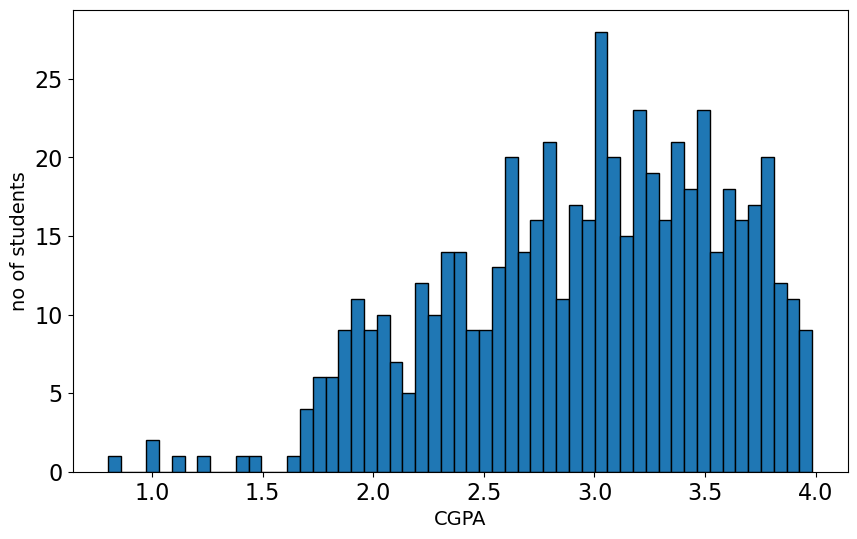

In [38]:
plt.figure(figsize=(10,6))
plt.hist(data["CGPA"], bins=55, ec='black')
plt.ylabel("no of students", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("CGPA", fontsize=14)

In [39]:
model1=data.iloc[:, :11]
model1['CGPA']=data['CGPA']

In [40]:
encode(model1)
model1.head()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,1.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,3.3,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,2.7,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,1.0,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,2.0,3.448


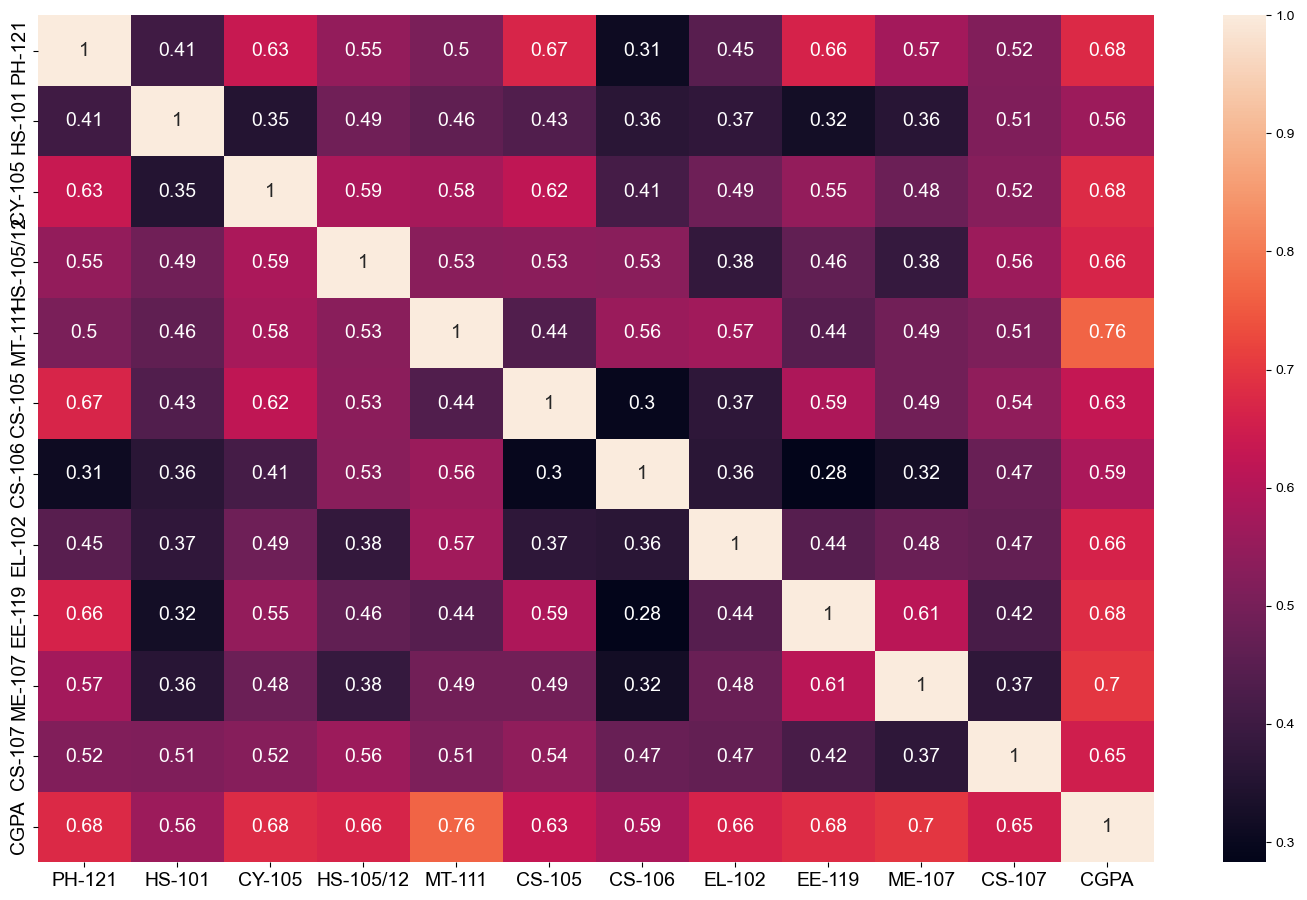

In [41]:
check_multicolinearity(model1)

In [42]:
check_null(model1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 570
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     566 non-null    float64
 1   HS-101     566 non-null    float64
 2   CY-105     566 non-null    float64
 3   HS-105/12  566 non-null    float64
 4   MT-111     566 non-null    float64
 5   CS-105     566 non-null    float64
 6   CS-106     566 non-null    float64
 7   EL-102     566 non-null    float64
 8   EE-119     566 non-null    float64
 9   ME-107     566 non-null    float64
 10  CS-107     566 non-null    float64
 11  CGPA       566 non-null    float64
dtypes: float64(12)
memory usage: 57.5 KB


In [43]:
model1_inputs=model1.drop('CGPA', axis=1)
model1_target=model1['CGPA']


At test size =  0.1
training score: 0.851| testing score: 0.865| mean squared error:  0.055

At test size =  0.2
training score: 0.86| testing score: 0.823| mean squared error:  0.0621

At test size =  0.25
training score: 0.864| testing score: 0.817| mean squared error:  0.0671

At test size =  0.3
training score: 0.863| testing score: 0.828| mean squared error:  0.0633

At test size =  0.35
training score: 0.855| testing score: 0.847| mean squared error:  0.0583

At test size =  0.4
training score: 0.856| testing score: 0.844| mean squared error:  0.0623

At test size =  0.45
training score: 0.85| testing score: 0.848| mean squared error:  0.0605

At test size =  0.5
training score: 0.854| testing score: 0.841| mean squared error:  0.0626

At test size =  0.6
training score: 0.851| testing score: 0.843| mean squared error:  0.0613

At test size =  0.7
training score: 0.863| testing score: 0.844| mean squared error:  0.0602


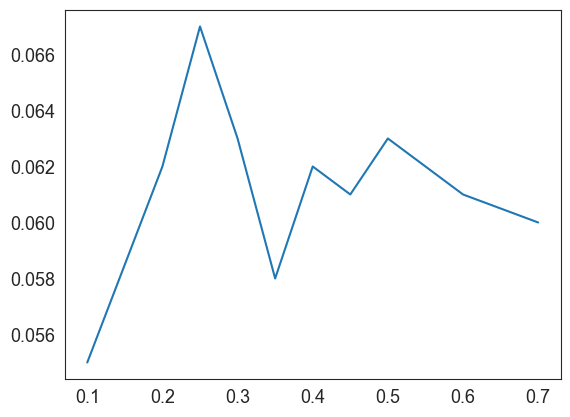

In [44]:
LR_best_split(model1_inputs, model1_target)

In [47]:
model2=data.iloc[:, :22]
model2['CGPA']=data['CGPA']

In [48]:
encode(model2)
model2.head()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,3.7,2.7,2.3,1.3,1.3,1.0,4.0,1.0,1.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.7,1.3,1.3,1.0,2.0,1.0,2.7,2.0,1.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,2.7,1.0,2.0,3.3,2.3,1.0,1.3,1.0,1.0,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7,3.448


In [49]:
check_null(model2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 570
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     562 non-null    float64
 1   HS-101     562 non-null    float64
 2   CY-105     562 non-null    float64
 3   HS-105/12  562 non-null    float64
 4   MT-111     562 non-null    float64
 5   CS-105     562 non-null    float64
 6   CS-106     562 non-null    float64
 7   EL-102     562 non-null    float64
 8   EE-119     562 non-null    float64
 9   ME-107     562 non-null    float64
 10  CS-107     562 non-null    float64
 11  HS-205/20  562 non-null    float64
 12  MT-222     562 non-null    float64
 13  EE-222     562 non-null    float64
 14  MT-224     562 non-null    float64
 15  CS-210     562 non-null    float64
 16  CS-211     562 non-null    float64
 17  CS-203     562 non-null    float64
 18  CS-214     562 non-null    float64
 19  EE-217     562 non-null    float64
 20  CS-212    

In [50]:
model2_inputs=model2.drop(['CGPA'], axis=1)
model2_target=model2['CGPA']

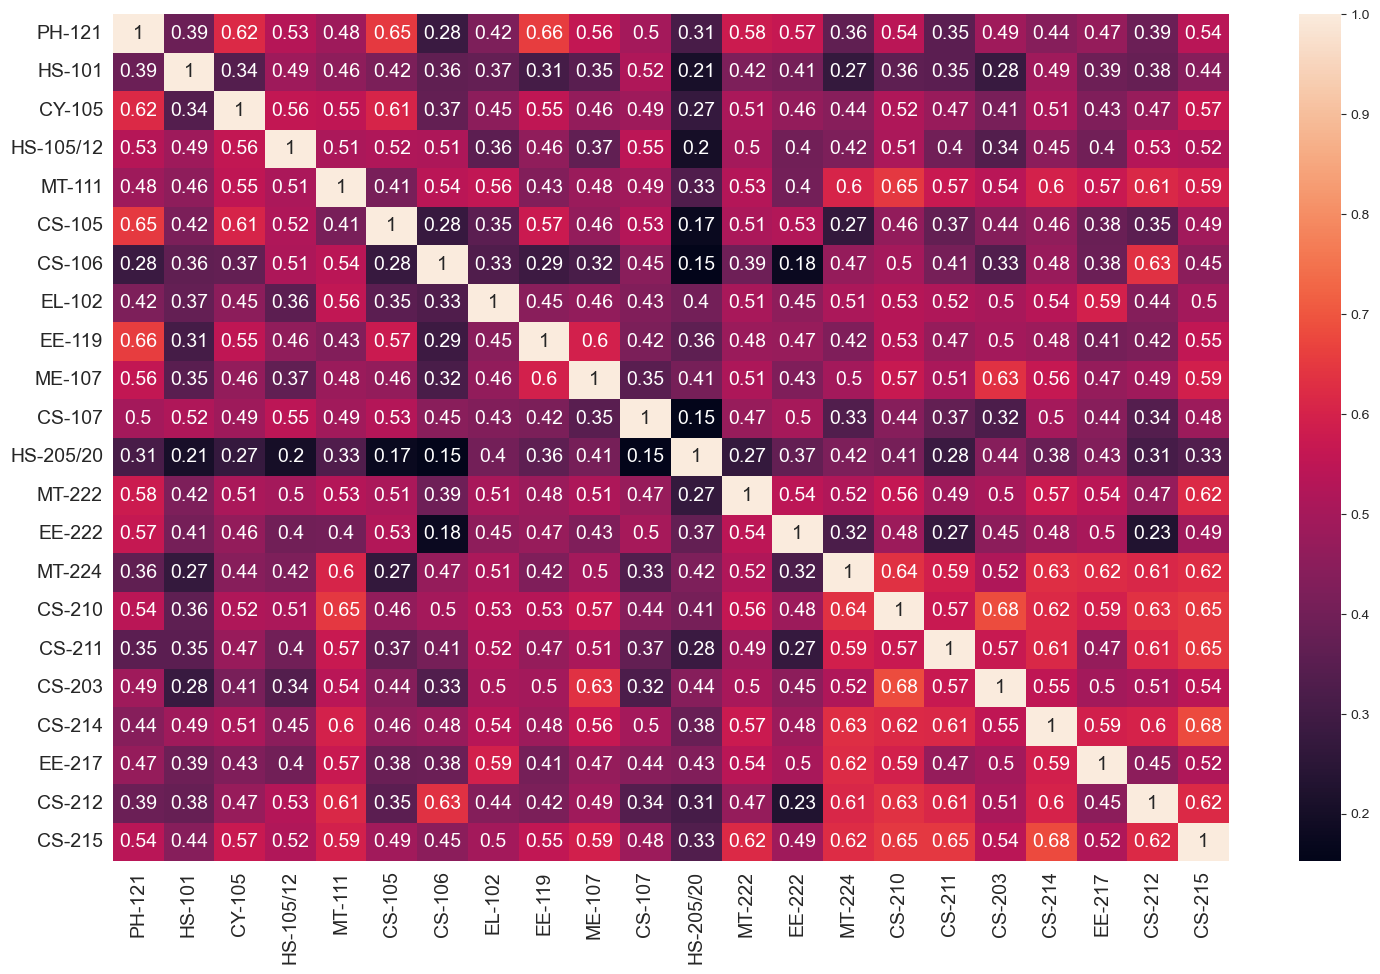

In [51]:
check_multicolinearity(model2_inputs)



At test size =  0.1
training score: 0.948| testing score: 0.946| mean squared error:  0.0161

At test size =  0.2
training score: 0.949| testing score: 0.943| mean squared error:  0.0197

At test size =  0.25
training score: 0.95| testing score: 0.939| mean squared error:  0.0222

At test size =  0.3
training score: 0.954| testing score: 0.931| mean squared error:  0.0245

At test size =  0.35
training score: 0.955| testing score: 0.932| mean squared error:  0.0239

At test size =  0.4
training score: 0.953| testing score: 0.936| mean squared error:  0.023

At test size =  0.45
training score: 0.954| testing score: 0.937| mean squared error:  0.0227

At test size =  0.5
training score: 0.954| testing score: 0.936| mean squared error:  0.0226

At test size =  0.6
training score: 0.953| testing score: 0.939| mean squared error:  0.021

At test size =  0.7
training score: 0.958| testing score: 0.931| mean squared error:  0.0244


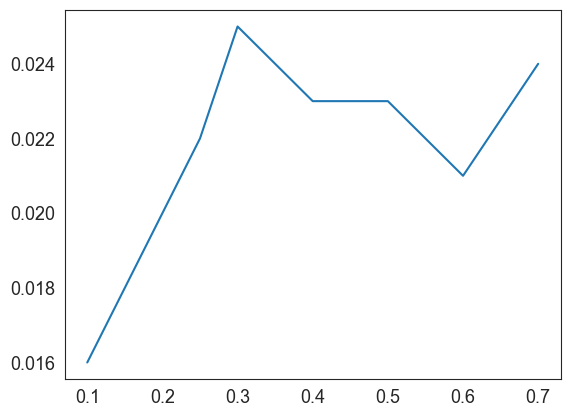

In [52]:
LR_best_split(model2_inputs, model2_target)

In [53]:
model3=data.iloc[:, :34]
model3['CGPA']=data['CGPA']
model3.drop('MT-442', axis=1, inplace=True)

In [54]:
encode(model3)
model3.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,2.3,3.0,2.0,2.3,2.0,1.7,2.0,1.7,1.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.7,3.7,1.3,1.7,2.0,3.7,1.0,1.3,1.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,4.0,3.3,3.7,3.0,3.3,3.7,3.7,3.0,3.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,2.7,1.0,2.7,1.3,1.3,3.3,1.7,1.3,2.0,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,2.7,3.7,2.3,3.7,2.7,3.7,2.7,3.3,3.448


In [55]:
check_null(model3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 570
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     559 non-null    float64
 1   HS-101     559 non-null    float64
 2   CY-105     559 non-null    float64
 3   HS-105/12  559 non-null    float64
 4   MT-111     559 non-null    float64
 5   CS-105     559 non-null    float64
 6   CS-106     559 non-null    float64
 7   EL-102     559 non-null    float64
 8   EE-119     559 non-null    float64
 9   ME-107     559 non-null    float64
 10  CS-107     559 non-null    float64
 11  HS-205/20  559 non-null    float64
 12  MT-222     559 non-null    float64
 13  EE-222     559 non-null    float64
 14  MT-224     559 non-null    float64
 15  CS-210     559 non-null    float64
 16  CS-211     559 non-null    float64
 17  CS-203     559 non-null    float64
 18  CS-214     559 non-null    float64
 19  EE-217     559 non-null    float64
 20  CS-212    

In [56]:
model3_target=model3['CGPA']
model3_inputs=model3.drop('CGPA', axis=1)

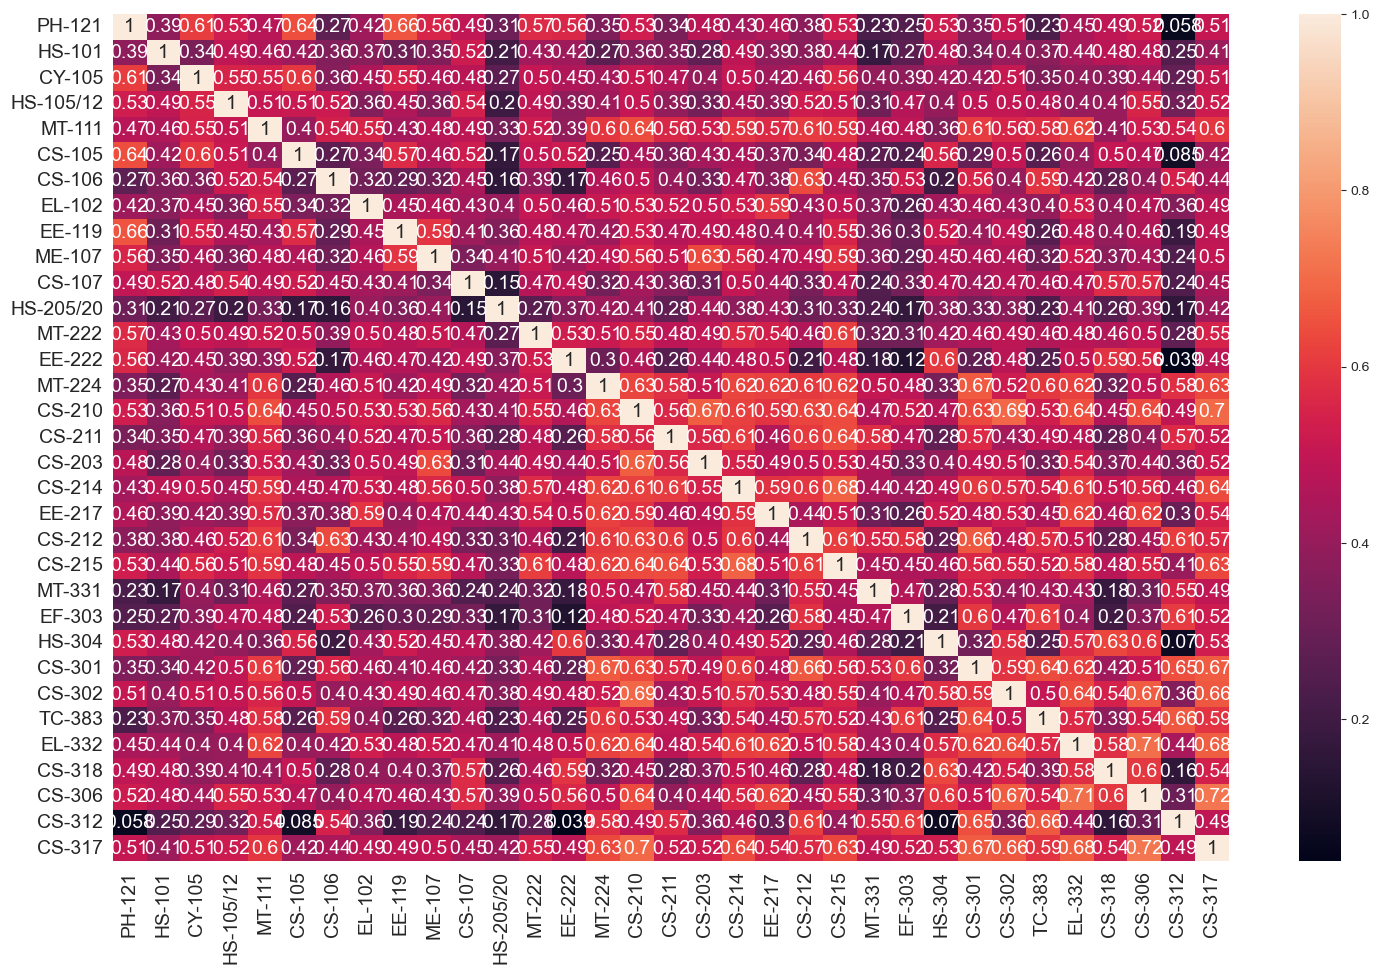

In [58]:
check_multicolinearity(model3_inputs)



At test size =  0.1
training score: 0.991| testing score: 0.985| mean squared error:  0.0051

At test size =  0.2
training score: 0.991| testing score: 0.988| mean squared error:  0.0039

At test size =  0.25
training score: 0.991| testing score: 0.99| mean squared error:  0.0038

At test size =  0.3
training score: 0.991| testing score: 0.988| mean squared error:  0.0041

At test size =  0.35
training score: 0.991| testing score: 0.988| mean squared error:  0.0042

At test size =  0.4
training score: 0.993| testing score: 0.985| mean squared error:  0.0053

At test size =  0.45
training score: 0.994| testing score: 0.985| mean squared error:  0.005

At test size =  0.5
training score: 0.993| testing score: 0.986| mean squared error:  0.0049

At test size =  0.6
training score: 0.994| testing score: 0.986| mean squared error:  0.0045

At test size =  0.7
training score: 0.994| testing score: 0.987| mean squared error:  0.0046


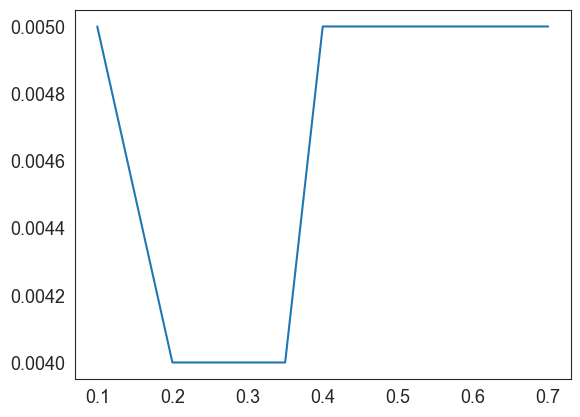

In [59]:
LR_best_split(model3_inputs, model3_target)

In [ ]:
def inputs(model_cols, model1_inputs, model1_target,model2_inputs,model2_target, model3_inputs,model3_target):
    grades=[]
    valid_grades=['A+','A-','A','B','B+','B-','C','C+','C-','D','D+','F','W','WU','I']
    for i in range(len(model_cols)-1):
            
        print(model_cols[i], ": ", end='')
        n=input()
        while n not in valid_grades:
            print("Invalid grade try again")
            print(model_cols[i], ": ", end='')
            n=input()
        grades.append(n)
    print("\nObtained grades : ",grades)
    grades_=pd.DataFrame(grades)
    grades_['serial_No']=np.arange(len(model_cols)-1)
    encode(grades_)
    grades_=np.array(grades_[0])
    
    print("\n \nUSING FE COURSES\n")
    algos(model1_inputs,model1_target, [grades_[0:11]], 10,2)
    
    print("\n \nUSING FE AND SE COURSES\n")
    algos(model2_inputs, model2_target, [grades_[0:22]],21,2)
    
    print("\n \nUSING FE, SE, TE COURSES\n")
    algos(model3_inputs, model3_target, [grades_[0:33]], 9 ,4)

In [ ]:

def main():
    model3_cols=model3.columns
    inputs(model3_cols,  model1_inputs, model1_target, model2_inputs,model2_target, model3_inputs,model3_target)

In [ ]:
main()